
#### CMPE: 257 Machine Learning
# Assignment 4 : Regression, MLP and Latent Manifolds
## Team: Climate Friends
## Project: Wildfire prediction
### Submission For : Manjiri Kadam

Assignment Objective:


1.   2-3 Latent Variables (Manifold) pertaining to your domain [Project]
2.   Implement a Multi-Layer Perceptron Neural Network with Keras
3.   Implement a Muller Loop: MLPRegressor, LinearRegression, RandomForestRegressor, KNNRegressor, XBoost Regressor, etc. [Project]


### Dataset used:
https://www.kaggle.com/rtatman/188-million-us-wildfires
We downloaded the above dataset, converted squlite file to .csv and using it for the project


### Mounting The google drive to read the dataset

In [1]:
# Mounting the drive to read the dataset
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Importing the required libraries:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns; sns.set()
# Reading the dataset in a dataframe
# df = pd.read_csv('/content/gdrive/MyDrive/FW_Veg_Rem_combined.csv')
# df.head(10)

## Data Wrangling


In [6]:
#Reading the csv file
# df2 = pd.read_csv('/content/drive/MyDrive/Data/database.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/Data/database.csv')
df2.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,18,35,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,NaN,NaN,NaN,NaN,NaN,2005,2453403.5,33,1300.0,9.0,Miscellaneous,2453403.5,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,13,13,AAC0,PIGEON,NaN,NaN,NaN,NaN,NaN,2004,2453137.5,133,845.0,1.0,Lightning,2453137.5,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,27,021,A32W,SLACK,NaN,NaN,NaN,NaN,NaN,2004,2453156.5,152,1921.0,5.0,Debris Burning,2453156.5,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,43,6,NaN,DEER,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,44,7,NaN,STEVENOT,NaN,NaN,NaN,NaN,NaN,2004,2453184.5,180,1600.0,1.0,Lightning,2453189.5,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [67]:
#Dropping the None Values to clean the dataset
df2= df2.dropna()
df2.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Dis_DATE,Con_DATE,Fire-duration,ALTITUDE
9956,9957,10003,FS-1437317,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,Klamath National Forest,59,11,C04X,RUSH,CA-KNF-003497,Uncles Complex,CA4109112300620060724,RUSH,UNCLES COMPLEX,2006,2453940.5,205,1316.0,1.0,Lightning,2454052.5,317.0,1800.0,4850.0,F,41.103333,-123.036667,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x004 )\xbfX\xc2^\xc0\xf...,2006-07-24,2006-11-13,112 days,1036.10
10418,10419,10467,FS-1437913,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,39,039,C0QH,RIDGE,CA-LPF-001440,Ridge,CA3491311929720060722,RIDGE,MT. PINOS LIGHTNING COMPLEX,2006,2453938.5,203,1530.0,1.0,Lightning,2453947.5,212.0,2000.0,2418.0,F,34.900833,-119.279444,5.0,USFS,CA,29,29.0,Kern,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xd1]\...,2006-07-22,2006-07-31,9 days,1614.80
11918,11919,11972,FS-1439980,FED,FS-FIRESTAT,FS,USCAMDF,Modoc National Forest,509,Modoc National Forest,9,225,B6UU,HIGH,CA-MDF-000242,Happy /Miller Complex,CA4144612130920060626,HIGH,HAPPY/MILLER COMPLEX,2006,2453912.5,177,1717.0,1.0,Lightning,2453931.5,196.0,1200.0,1049.0,F,41.469167,-121.334722,5.0,USFS,CA,49,49.0,Modoc,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lU^\xc0\x...,2006-06-26,2006-07-15,19 days,1325.71
12489,12490,12544,FS-1440706,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,417,Humboldt-Toiyabe National Forest,81,HTF-1138,CR35,BALLS CANYON,NV-HTF-1138,BALLS CANYON,CA3966612007920060625,BALLS CANYON,SIERRA-TAHOE COMPLEX,2006,2453911.5,176,1725.0,1.0,Lightning,2453979.5,244.0,1800.0,1805.0,F,39.661944,-120.082778,13.0,STATE OR PRIVATE,CA,91,91.0,Sierra,"b'\x00\x01\xad\x10\x00\x00\xdc{,;L\x05^\xc0\xe...",2006-06-25,2006-09-01,68 days,1919.37
13857,13858,13918,FS-1442617,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,44,044,C0T1,BALD,CA-LPF-1442,BALD,CA3493011996120060722,BALD,SAN RAFAEL COMPLEX,2006,2453938.5,203,1825.0,1.0,Lightning,2453946.5,211.0,1800.0,1250.0,F,34.925000,-119.959722,5.0,USFS,CA,83,83.0,Santa Barbara,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16l\xfd]\xc...,2006-07-22,2006-07-30,8 days,991.15


In [8]:
#describing colunms
df2.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

From the dataset, I am going to focus on "California" wildfires.

In [9]:
#Filtering out all other states
df2 = df2[df2['STATE'] == 'CA']
df2.head()


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
9956,9957,10003,FS-1437317,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,Klamath National Forest,59,11,C04X,RUSH,CA-KNF-003497,Uncles Complex,CA4109112300620060724,RUSH,UNCLES COMPLEX,2006,2453940.5,205,1316.0,1.0,Lightning,2454052.5,317.0,1800.0,4850.0,F,41.103333,-123.036667,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x004 )\xbfX\xc2^\xc0\xf...
10418,10419,10467,FS-1437913,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,39,039,C0QH,RIDGE,CA-LPF-001440,Ridge,CA3491311929720060722,RIDGE,MT. PINOS LIGHTNING COMPLEX,2006,2453938.5,203,1530.0,1.0,Lightning,2453947.5,212.0,2000.0,2418.0,F,34.900833,-119.279444,5.0,USFS,CA,29,29.0,Kern,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xd1]\...
11918,11919,11972,FS-1439980,FED,FS-FIRESTAT,FS,USCAMDF,Modoc National Forest,509,Modoc National Forest,9,225,B6UU,HIGH,CA-MDF-000242,Happy /Miller Complex,CA4144612130920060626,HIGH,HAPPY/MILLER COMPLEX,2006,2453912.5,177,1717.0,1.0,Lightning,2453931.5,196.0,1200.0,1049.0,F,41.469167,-121.334722,5.0,USFS,CA,49,49.0,Modoc,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lU^\xc0\x...
12489,12490,12544,FS-1440706,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,417,Humboldt-Toiyabe National Forest,81,HTF-1138,CR35,BALLS CANYON,NV-HTF-1138,BALLS CANYON,CA3966612007920060625,BALLS CANYON,SIERRA-TAHOE COMPLEX,2006,2453911.5,176,1725.0,1.0,Lightning,2453979.5,244.0,1800.0,1805.0,F,39.661944,-120.082778,13.0,STATE OR PRIVATE,CA,91,91.0,Sierra,"b'\x00\x01\xad\x10\x00\x00\xdc{,;L\x05^\xc0\xe..."
13857,13858,13918,FS-1442617,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,44,044,C0T1,BALD,CA-LPF-1442,BALD,CA3493011996120060722,BALD,SAN RAFAEL COMPLEX,2006,2453938.5,203,1825.0,1.0,Lightning,2453946.5,211.0,1800.0,1250.0,F,34.925000,-119.959722,5.0,USFS,CA,83,83.0,Santa Barbara,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16l\xfd]\xc...


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 9956 to 1795222
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   OBJECTID                    118 non-null    int64  
 1   FOD_ID                      118 non-null    int64  
 2   FPA_ID                      118 non-null    object 
 3   SOURCE_SYSTEM_TYPE          118 non-null    object 
 4   SOURCE_SYSTEM               118 non-null    object 
 5   NWCG_REPORTING_AGENCY       118 non-null    object 
 6   NWCG_REPORTING_UNIT_ID      118 non-null    object 
 7   NWCG_REPORTING_UNIT_NAME    118 non-null    object 
 8   SOURCE_REPORTING_UNIT       118 non-null    object 
 9   SOURCE_REPORTING_UNIT_NAME  118 non-null    object 
 10  LOCAL_FIRE_REPORT_ID        118 non-null    object 
 11  LOCAL_INCIDENT_ID           118 non-null    object 
 12  FIRE_CODE                   118 non-null    object 
 13  FIRE_NAME                   

##**1) Latent variables: Duration of Fire**

I have calculated two latent variable for our project. "Duration fire" is calculated by calulating the difference of Discovery date and Date whan fire was contained. Epoch value of these dates were given, I converted these values to human readable format first and then calculated the difference.

In [12]:
# For calculating the Latent variable converiting DISCOVERY_DATE and CONT_DATE in human readable format
df2['Dis_DATE'] = pd.to_datetime(df2['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
(df2.head())


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Dis_DATE
9956,9957,10003,FS-1437317,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,Klamath National Forest,59,11,C04X,RUSH,CA-KNF-003497,Uncles Complex,CA4109112300620060724,RUSH,UNCLES COMPLEX,2006,2453940.5,205,1316.0,1.0,Lightning,2454052.5,317.0,1800.0,4850.0,F,41.103333,-123.036667,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x004 )\xbfX\xc2^\xc0\xf...,2006-07-24
10418,10419,10467,FS-1437913,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,39,039,C0QH,RIDGE,CA-LPF-001440,Ridge,CA3491311929720060722,RIDGE,MT. PINOS LIGHTNING COMPLEX,2006,2453938.5,203,1530.0,1.0,Lightning,2453947.5,212.0,2000.0,2418.0,F,34.900833,-119.279444,5.0,USFS,CA,29,29.0,Kern,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xd1]\...,2006-07-22
11918,11919,11972,FS-1439980,FED,FS-FIRESTAT,FS,USCAMDF,Modoc National Forest,509,Modoc National Forest,9,225,B6UU,HIGH,CA-MDF-000242,Happy /Miller Complex,CA4144612130920060626,HIGH,HAPPY/MILLER COMPLEX,2006,2453912.5,177,1717.0,1.0,Lightning,2453931.5,196.0,1200.0,1049.0,F,41.469167,-121.334722,5.0,USFS,CA,49,49.0,Modoc,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lU^\xc0\x...,2006-06-26
12489,12490,12544,FS-1440706,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,417,Humboldt-Toiyabe National Forest,81,HTF-1138,CR35,BALLS CANYON,NV-HTF-1138,BALLS CANYON,CA3966612007920060625,BALLS CANYON,SIERRA-TAHOE COMPLEX,2006,2453911.5,176,1725.0,1.0,Lightning,2453979.5,244.0,1800.0,1805.0,F,39.661944,-120.082778,13.0,STATE OR PRIVATE,CA,91,91.0,Sierra,"b'\x00\x01\xad\x10\x00\x00\xdc{,;L\x05^\xc0\xe...",2006-06-25
13857,13858,13918,FS-1442617,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,44,044,C0T1,BALD,CA-LPF-1442,BALD,CA3493011996120060722,BALD,SAN RAFAEL COMPLEX,2006,2453938.5,203,1825.0,1.0,Lightning,2453946.5,211.0,1800.0,1250.0,F,34.925000,-119.959722,5.0,USFS,CA,83,83.0,Santa Barbara,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16l\xfd]\xc...,2006-07-22


In [13]:
df2['Con_DATE'] = pd.to_datetime(df2['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
(df2.head())


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Dis_DATE,Con_DATE
9956,9957,10003,FS-1437317,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,Klamath National Forest,59,11,C04X,RUSH,CA-KNF-003497,Uncles Complex,CA4109112300620060724,RUSH,UNCLES COMPLEX,2006,2453940.5,205,1316.0,1.0,Lightning,2454052.5,317.0,1800.0,4850.0,F,41.103333,-123.036667,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x004 )\xbfX\xc2^\xc0\xf...,2006-07-24,2006-11-13
10418,10419,10467,FS-1437913,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,39,039,C0QH,RIDGE,CA-LPF-001440,Ridge,CA3491311929720060722,RIDGE,MT. PINOS LIGHTNING COMPLEX,2006,2453938.5,203,1530.0,1.0,Lightning,2453947.5,212.0,2000.0,2418.0,F,34.900833,-119.279444,5.0,USFS,CA,29,29.0,Kern,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xd1]\...,2006-07-22,2006-07-31
11918,11919,11972,FS-1439980,FED,FS-FIRESTAT,FS,USCAMDF,Modoc National Forest,509,Modoc National Forest,9,225,B6UU,HIGH,CA-MDF-000242,Happy /Miller Complex,CA4144612130920060626,HIGH,HAPPY/MILLER COMPLEX,2006,2453912.5,177,1717.0,1.0,Lightning,2453931.5,196.0,1200.0,1049.0,F,41.469167,-121.334722,5.0,USFS,CA,49,49.0,Modoc,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lU^\xc0\x...,2006-06-26,2006-07-15
12489,12490,12544,FS-1440706,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,417,Humboldt-Toiyabe National Forest,81,HTF-1138,CR35,BALLS CANYON,NV-HTF-1138,BALLS CANYON,CA3966612007920060625,BALLS CANYON,SIERRA-TAHOE COMPLEX,2006,2453911.5,176,1725.0,1.0,Lightning,2453979.5,244.0,1800.0,1805.0,F,39.661944,-120.082778,13.0,STATE OR PRIVATE,CA,91,91.0,Sierra,"b'\x00\x01\xad\x10\x00\x00\xdc{,;L\x05^\xc0\xe...",2006-06-25,2006-09-01
13857,13858,13918,FS-1442617,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,44,044,C0T1,BALD,CA-LPF-1442,BALD,CA3493011996120060722,BALD,SAN RAFAEL COMPLEX,2006,2453938.5,203,1825.0,1.0,Lightning,2453946.5,211.0,1800.0,1250.0,F,34.925000,-119.959722,5.0,USFS,CA,83,83.0,Santa Barbara,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16l\xfd]\xc...,2006-07-22,2006-07-30


In [14]:
# Calculating the Latent varible : Duration of Fire in Days
# df2 = df2.apply(pd.to_datetime)
df2['Fire-duration'] = df2["Con_DATE"] - df2["Dis_DATE"]
df2.head(10)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Dis_DATE,Con_DATE,Fire-duration
9956,9957,10003,FS-1437317,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,Klamath National Forest,59,11,C04X,RUSH,CA-KNF-003497,Uncles Complex,CA4109112300620060724,RUSH,UNCLES COMPLEX,2006,2453940.5,205,1316.0,1.0,Lightning,2454052.5,317.0,1800.0,4850.0,F,41.103333,-123.036667,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x004 )\xbfX\xc2^\xc0\xf...,2006-07-24,2006-11-13,112 days
10418,10419,10467,FS-1437913,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,39,039,C0QH,RIDGE,CA-LPF-001440,Ridge,CA3491311929720060722,RIDGE,MT. PINOS LIGHTNING COMPLEX,2006,2453938.5,203,1530.0,1.0,Lightning,2453947.5,212.0,2000.0,2418.0,F,34.900833,-119.279444,5.0,USFS,CA,29,29.0,Kern,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xd1]\...,2006-07-22,2006-07-31,9 days
11918,11919,11972,FS-1439980,FED,FS-FIRESTAT,FS,USCAMDF,Modoc National Forest,509,Modoc National Forest,9,225,B6UU,HIGH,CA-MDF-000242,Happy /Miller Complex,CA4144612130920060626,HIGH,HAPPY/MILLER COMPLEX,2006,2453912.5,177,1717.0,1.0,Lightning,2453931.5,196.0,1200.0,1049.0,F,41.469167,-121.334722,5.0,USFS,CA,49,49.0,Modoc,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lU^\xc0\x...,2006-06-26,2006-07-15,19 days
12489,12490,12544,FS-1440706,FED,FS-FIRESTAT,FS,USNVHTF,Humboldt-Toiyabe National Forest,417,Humboldt-Toiyabe National Forest,81,HTF-1138,CR35,BALLS CANYON,NV-HTF-1138,BALLS CANYON,CA3966612007920060625,BALLS CANYON,SIERRA-TAHOE COMPLEX,2006,2453911.5,176,1725.0,1.0,Lightning,2453979.5,244.0,1800.0,1805.0,F,39.661944,-120.082778,13.0,STATE OR PRIVATE,CA,91,91.0,Sierra,"b'\x00\x01\xad\x10\x00\x00\xdc{,;L\x05^\xc0\xe...",2006-06-25,2006-09-01,68 days
13857,13858,13918,FS-1442617,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,44,044,C0T1,BALD,CA-LPF-1442,BALD,CA3493011996120060722,BALD,SAN RAFAEL COMPLEX,2006,2453938.5,203,1825.0,1.0,Lightning,2453946.5,211.0,1800.0,1250.0,F,34.925000,-119.959722,5.0,USFS,CA,83,83.0,Santa Barbara,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16l\xfd]\xc...,2006-07-22,2006-07-30,8 days
14233,14234,14297,FS-1443059,FED,FS-FIRESTAT,FS,USCASRF,Six Rivers National Forest,510,Six Rivers National Forest,27,52-06,C1UK,SOMES,CA-SRF-997,ORLEANS COMPLEX,CA4133612346520060724,ORLEANS COMPLEX,ORLEANS COMPLEX,2006,2453940.5,205,1703.0,1.0,Lightning,2454026.5,291.0,1800.0,15710.0,G,41.315000,-123.496667,5.0,USFS,CA,23,23.0,Humboldt,b'\x00\x01\xad\x10\x00\x00p*\x00c\xc9\xdf^\xc0...,2006-07-24,2006-10-18,86 days
14500,14501,14570,FS-1443388,FED,FS-FIRESTAT,FS,USCASRF,Six Rivers National Forest,510,Six Rivers National Forest,28,58-02,C6L7,HANCOCK,CA-KNF-003497,Uncles Complex,CA4142612330620060724,HANCOCK,UNCLES COMPLEX,2006,2453940.5,205,2222.0,1.0,Lightning,2454031.5,296.0,1800.0,10770.0,G,41.448889,-123.292500,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x00\x1c\x85\xebQ\xb8\xd...,2006-07-24,2006-10-23,91 days
15100,15101,15173,FS-1444094,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,12,012,CQ47,PERKINS,CA-LPF-1060,Perkins,CA3485111969520060619,PERKINS,PERKINS COMPLEX,2006,2453905.5,170,1322.0,9.0,Miscellaneous,2453936.5,201.0,1800.0,14988.0,G,34.943611,-119.687222,14.0,MISSING/NOT SPECIFIED,CA,83,83.0,Santa Barbara,b'\x00\x01\xad\x10\x00\x00\x00\xff\xe7r\xfb\xe...,2006-06-19,2006-07-20,31 days
15103,15104,15176,FS-1444097,FED,FS-FIRESTAT,FS,USCAMNF,Mendocino National Forest,508,Mendocino National Forest,

I wanted to see what are the causes of Wildfire, so plotted below graph. From which we can infer that most of the fire in *California* is caused by "*Lightning*".

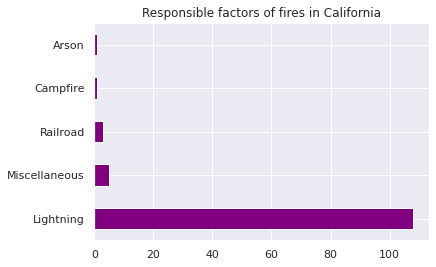

In [15]:
#Causes of fire in California
df2['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='purple',title='Responsible factors of fires in California')
plt.show()

I have plotted the graph by using 'Latitude' and 'Longitude'

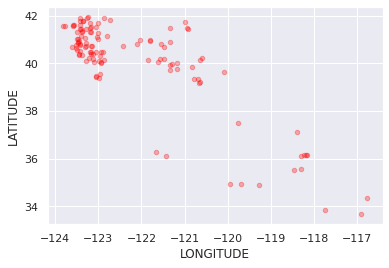

In [16]:
#Plotting the area which got affected by the fire.
df2.plot(kind='scatter',x='LONGITUDE',y='LATITUDE',color='red',alpha=0.3)
plt.show()

After seeing the above graph, I wanted to visualize it in better way, so plotted the graph over California map. We can see that most of the fire happened in Northen area. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


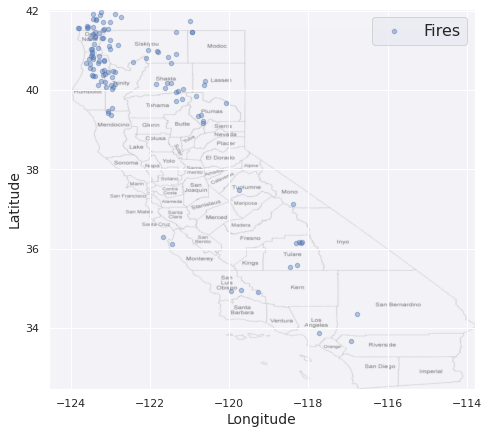

In [17]:
#Following exersise is to map the co-ordinates over California Map

import matplotlib.image as mpimg
california_img=mpimg.imread('/content/gdrive/MyDrive/california.png')
ax = df2.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", figsize=(10,7),
                        label="Fires",
                        cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend(fontsize=16)
plt.show()

##**2) Latent Variable : Altitude (from Longitude and Lattitude)**
Second latent variable is Altitude, which is calulated by using the co-ordinates (Latitude and Longitude)
I have used "National Map Gov" API's to get Geo Information.
https://nationalmap.gov


In [18]:
import json
import requests
import urllib
import urllib3
import pandas as pd
def make_remote_request(url: str, params: dict) -> json:
    """
    Makes the remote request
    Continues making attempts until it succeeds
    """

    count = 1
    while True:
        try:
            response = requests.get((url + urllib.parse.urlencode(params)))
        except (OSError, urllib3.exceptions.ProtocolError) as error:
            print('\n')
            print('*' * 20, 'Error Occured', '*' * 20)
            print(f'Number of tries: {count}')
            print(f'URL: {url}')
            print(error)
            print('\n')
            count += 1
            continue
        break

    return response


def eleveation_function(x):
    url = 'https://nationalmap.gov/epqs/pqs.php?'
    params = {'x': x[1],
              'y': x[0],
              'units': 'Meters',
              'output': 'json'}
    result = make_remote_request(url, params)
    return result.json()['USGS_Elevation_Point_Query_Service']['Elevation_Query']['Elevation']


In [20]:
# Creating a new df of Latitude and Longitude to calculate the Altitude
df_ll = df2[["LATITUDE","LONGITUDE"]]
df_ll.head()

,LATITUDE,LONGITUDE
9956,41.103333,-123.036667
10418,34.900833,-119.279444
11918,41.469167,-121.334722
12489,39.661944,-120.082778
13857,34.925000,-119.959722


In [21]:
df_ll['ALTITUDE'] = df_ll.apply(eleveation_function, axis=1)
df_ll.head()
#Calculated the Altitude of Wildfire location based on Latitude and Longitude. The values below are in meters.



******************** Error Occured ********************
Number of tries: 1
URL: https://nationalmap.gov/epqs/pqs.php?
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))




******************** Error Occured ********************
Number of tries: 1
URL: https://nationalmap.gov/epqs/pqs.php?
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))




******************** Error Occured ********************
Number of tries: 1
URL: https://nationalmap.gov/epqs/pqs.php?
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))




******************** Error Occured ********************
Number of tries: 1
URL: https://nationalmap.gov/epqs/pqs.php?
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))




******************** Error Occured ********************
Number of tries: 1
URL: https://nationalmap.gov/epqs/pqs.php?
('Connection aborted

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LATITUDE,LONGITUDE,ALTITUDE
9956,41.103333,-123.036667,1036.10
10418,34.900833,-119.279444,1614.80
11918,41.469167,-121.334722,1325.71
12489,39.661944,-120.082778,1919.37
13857,34.925000,-119.959722,991.15


Created a new dataframe with Altitude as an additional attribute. Altitude is height from sea level

In [22]:
df_ll.sample(10)


,LATITUDE,LONGITUDE,ALTITUDE
15179,40.218889,-120.607222,1708.87
1795187,40.386111,-123.447222,795.54
33490,40.150278,-121.847500,363.94
33369,39.786111,-121.187222,1609.29
30194,40.669722,-123.305556,1124.68
32878,40.716667,-122.434444,231.08
14233,41.315000,-123.496667,919.16
1063039,40.721944,-123.281944,1015.91
30490,39.428889,-123.064167,1205.85
31508,40.222500,-123.222222,1267.10


In [23]:
df_ll.to_csv('/content/gdrive/MyDrive/Data/altitude.csv')

In [24]:
df2.sample(5)


,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Dis_DATE,Con_DATE,Fire-duration
1726377,1726378,300004537,FS-1522864,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,93,16,H98M,COFFEE,733393,COFFEE,CA4114112280520140802,COFFEE COMPLEX,COFFEE COMPLEX,2014,2456867.5,210,2000.0,1.0,Lightning,2456960.5,303.0,1430.0,6258.0,G,41.140833,-122.804722,5.0,USFS,CA,Trinity,105.0,Trinity,b'\x00\x01\xad\x10\x00\x00\xecP\xa0\x91\x80\xb...,2014-07-29,2014-10-30,93 days
1722220,1722221,300000289,FS-1526439,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,0505,Klamath National Forest,108,19,JB1F,FAULKSTEIN,826309,FALKSTEIN,CA4179612337420140814,HAPPY CAMP COMPLEX,HAPPY CAMP COMPLEX,2014,2456880.5,223,1845.0,1.0,Lightning,2456894.5,237.0,2000.0,5225.0,G,41.705000,-123.191111,5.0,USFS,CA,Siskiyou,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x00\x88\xd6\x17*;\xcc^\...,2014-08-11,2014-08-25,14 days
1722215,1722216,300000284,FS-1526136,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,0505,Klamath National Forest,93,11,JB1F,DELTA,818745,DELTA,CA4179612337420140814,HAPPY CAMP COMPLEX,HAPPY CAMP COMPLEX,2014,2456880.5,223,1830.0,1.0,Lightning,2456898.5,241.0,1800.0,150.0,D,41.792778,-123.361389,5.0,USFS,CA,Siskiyou,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x00\x00\xec\xdd\xfe \xd...,2014-08-11,2014-08-29,18 days
38010,38011,38202,FS-1480062,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,100,8,E3ZN,GOOSE,CA-SHU-5594,SHU Lightning,CA4097312176220090802,SHU LIGHTNING COMPLEX (GOOSE),SHU LIGHTNING COMPLEX 2009,2009,2455045.5,214,1526.0,1.0,Lightning,2455075.5,244.0,1800.0,3949.0,F,40.955000,-121.794444,5.0,USFS,CA,89,89.0,Shasta,b'\x00\x01\xad\x10\x00\x00|\x12~-\xd8r^\xc0\x1...,2009-08-02,2009-09-01,30 days
1793221,1793222,300204530,FS-6354218,FED,FS-FIRESTAT,FS,USCASHF,Shasta-Trinity National Forest,0514,Shasta-Trinity National Forest,197,33,J0MZ,JOHNSON,2.92854e+06,JOHNSON,CA4064212358620150731,ROUTE COMPLEX,ROUTE COMPLEX,2015,2457233.5,211,1925.0,1.0,Lightning,2457325.5,303.0,1000.0,34006.0,G,40.554444,-123.501111,5.0,USFS,CA,105,105.0,Trinity,"b'\x00\x01\xad\x10\x00\x00,GU4\x12\xe0^\xc0\xe...",2015-07-30,2015-10-30,92 days


In [25]:
#Using above dataframe, going to merge altitude column to mane dataframe
df2["ALTITUDE"] = df_ll['ALTITUDE']
df2.head(3)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,Dis_DATE,Con_DATE,Fire-duration,ALTITUDE
9956,9957,10003,FS-1437317,FED,FS-FIRESTAT,FS,USCAKNF,Klamath National Forest,505,Klamath National Forest,59,11,C04X,RUSH,CA-KNF-003497,Uncles Complex,CA4109112300620060724,RUSH,UNCLES COMPLEX,2006,2453940.5,205,1316.0,1.0,Lightning,2454052.5,317.0,1800.0,4850.0,F,41.103333,-123.036667,5.0,USFS,CA,93,93.0,Siskiyou,b'\x00\x01\xad\x10\x00\x004 )\xbfX\xc2^\xc0\xf...,2006-07-24,2006-11-13,112 days,1036.10
10418,10419,10467,FS-1437913,FED,FS-FIRESTAT,FS,USCALPF,Los Padres National Forest,507,Los Padres National Forest,39,039,C0QH,RIDGE,CA-LPF-001440,Ridge,CA3491311929720060722,RIDGE,MT. PINOS LIGHTNING COMPLEX,2006,2453938.5,203,1530.0,1.0,Lightning,2453947.5,212.0,2000.0,2418.0,F,34.900833,-119.279444,5.0,USFS,CA,29,29.0,Kern,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\xd1]\...,2006-07-22,2006-07-31,9 days,1614.80
11918,11919,11972,FS-1439980,FED,FS-FIRESTAT,FS,USCAMDF,Modoc National Forest,509,Modoc National Forest,9,225,B6UU,HIGH,CA-MDF-000242,Happy /Miller Complex,CA4144612130920060626,HIGH,HAPPY/MILLER COMPLEX,2006,2453912.5,177,1717.0,1.0,Lightning,2453931.5,196.0,1200.0,1049.0,F,41.469167,-121.334722,5.0,USFS,CA,49,49.0,Modoc,b'\x00\x01\xad\x10\x00\x00<\t\xbf\x16lU^\xc0\x...,2006-06-26,2006-07-15,19 days,1325.71


#Linear Regression

### Calculating the probability of fire occurance based on Latitude and Longitude data


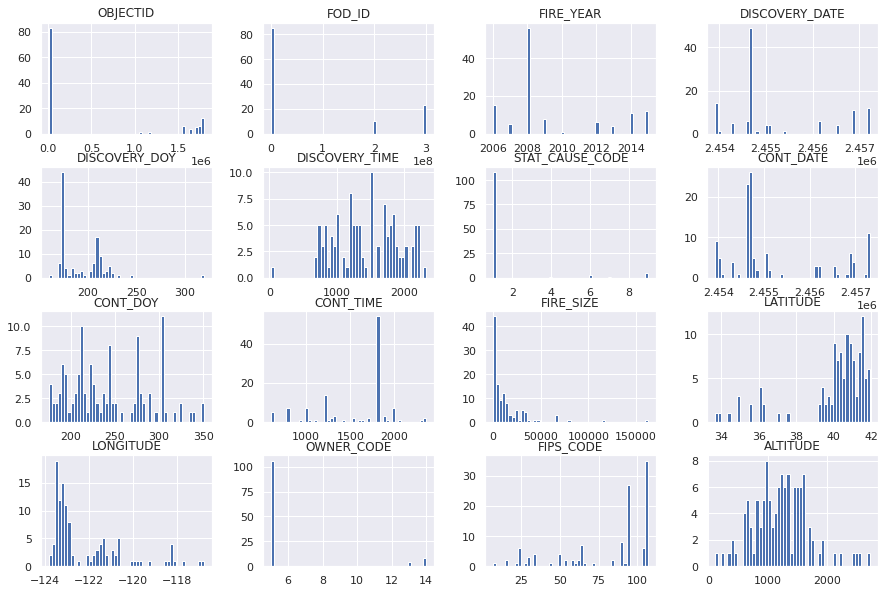

In [26]:
#plotting the histogram for all the attribute present in the dataframe.
df2.hist(bins=50, figsize=(15,10), ec='w')
plt.show()

## Looking at below output we can say that places of high altitude have a lots of fires.


In [27]:
# Creating a new dataframe after hthe data wrangling
df_new = df2[['LOCAL_FIRE_REPORT_ID','FIRE_NAME','FIRE_YEAR','STAT_CAUSE_DESCR','FIRE_SIZE','LATITUDE','LONGITUDE','Dis_DATE','Con_DATE','Fire-duration','ALTITUDE']]
df_new.describe()


,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,Fire-duration,ALTITUDE
count,118.000000,118.000000,118.000000,118.000000,118,118.000000
mean,2009.432203,14490.404915,40.053067,-122.163263,49 days 02:26:26.440677966,1226.805932
std,2.945310,22723.344216,1.938651,1.679259,40 days 10:58:48.828947431,469.324675
min,2006.000000,2.000000,33.666944,-123.820556,0 days 00:00:00,111.960000
25%,2008.000000,2176.500000,39.982500,-123.360000,15 days 06:00:00,925.707500
50%,2008.000000,6364.500000,40.667917,-123.002500,39 days 00:00:00,1229.560000
75%,2012.000000,15627.000000,41.313819,-121.335139,71 days 00:00:00,1511.760000
max,2015.000000,162818.000000,41.959722,-116.766667,177 days 00:00:00,2738.160000


In [28]:
df_new.sample()

,LOCAL_FIRE_REPORT_ID,FIRE_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,Dis_DATE,Con_DATE,Fire-duration,ALTITUDE
1568011,15,MDFDHBSFMU06LAKE,2012,Lightning,1667.0,41.751389,-120.996389,2012-08-05,2012-08-09,4 days,1450.04


### Part 2: Applying Keras


In [29]:
X = df_new[['ALTITUDE', 'FIRE_SIZE']]
y = df_new['FIRE_YEAR']

In [30]:
X

,ALTITUDE,FIRE_SIZE
9956,1036.10,4850.0
10418,1614.80,2418.0
11918,1325.71,1049.0
12489,1919.37,1805.0
13857,991.15,1250.0
...,...,...
1793225,1504.98,2826.0
1793226,994.37,15378.0
1795187,795.54,18178.0
1795194,1272.05,11004.0


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df_new['FIRE_YEAR'])

In [33]:
#Load the packages for karas
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
# Load the data set and split for training and testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [35]:
# defining the keras model
model = Sequential()
model.add(Dense(12, input_dim=2, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=10)
# keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

predictions = model.predict(X)

for i in range(5):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

Epoch 1/100
12/12 [==============================] - 1s 2ms/step - loss: 0.9361 - accuracy: 0.1186
Epoch 2/100
12/12 [==============================] - 0s 1ms/step - loss: 0.8152 - accuracy: 0.0932
Epoch 3/100
12/12 [==============================] - 0s 1ms/step - loss: 0.7191 - accuracy: 0.0847
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.6302 - accuracy: 0.0847
Epoch 5/100
12/12 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.0678
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.0508
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.0593
Epoch 8/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3817 - accuracy: 0.0424
Epoch 9/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.0424
Epoch 10/100
12/12 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.0424
Epoch 11/

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8])

### Part 3: Applying Muller loop

In [37]:
#Muller Loop regression
from sklearn import metrics
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

names = ["Nearest Neighbors", "Linear SVR", "Gaussian Process",
         "Decision Tree", "Random Forest", "MLP", "AdaBoost"
         ]

regression = [
    KNeighborsRegressor(2),
    SVR(kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1),
    GaussianProcessRegressor(kernel=None, alpha=1e-10, optimizer='fmin_l_bfgs_b', n_restarts_optimizer=0, normalize_y=False, copy_X_train=True, random_state=None),
    DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1500),
    AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
    # GaussianNB()]
    # QuadraticDiscriminantAnalysis()
    ]
output = pd.DataFrame(columns=['regressor', 'mae', 'mse', 'Rsquared', 'accuracy'])

In [38]:
output

,regressor,mae,mse,Rsquared,accuracy


In [39]:
import time

max_score = 0.0
max_class = ''
# iterate over regressor
for name, clf in zip(names, regression):
    start_time = time.process_time()
    clf.fit(X_train, y_train)
  
    score = 100.0 * clf.score(X_test, y_test)
    y_predict = clf.predict(X_test)

    
    mae = np.round(metrics.mean_absolute_error(y_test, y_predict), 2)
    mse = np.round(metrics.mean_squared_error(y_test, y_predict), 2)
    rsquared = np.round(metrics.r2_score(y_test, y_predict), 2)
    output = output.append({'regressor': name, 'mae':mae, 'mse':mse,'Rsquared':rsquared, 'accuracy':score}, ignore_index=True)

    # print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
    # print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
    # print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))
    # print('Regression = %s, Score (accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds,'%(time.process_time() - start_time))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name
print(output)
print(80*'-' )
print('Best --> Regression = %s, Score (accuracy) = %.2f' %(max_class, max_score))

           regressor    mae       mse  Rsquared       accuracy
0  Nearest Neighbors   2.25      8.72     -0.40     -40.404919
1         Linear SVR   1.67      7.57     -0.22     -21.934605
2   Gaussian Process  66.45  23449.13  -3773.70 -377369.596332
3      Decision Tree   2.72     13.94     -1.24    -124.469010
4      Random Forest   2.02      6.73     -0.08      -8.384241
5                MLP   2.13      9.60     -0.55     -54.594806
6           AdaBoost   1.97      6.00      0.03       3.427199
--------------------------------------------------------------------------------
Best --> Regression = AdaBoost, Score (accuracy) = 3.43


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc6a3d7250>,
      dtype=object)

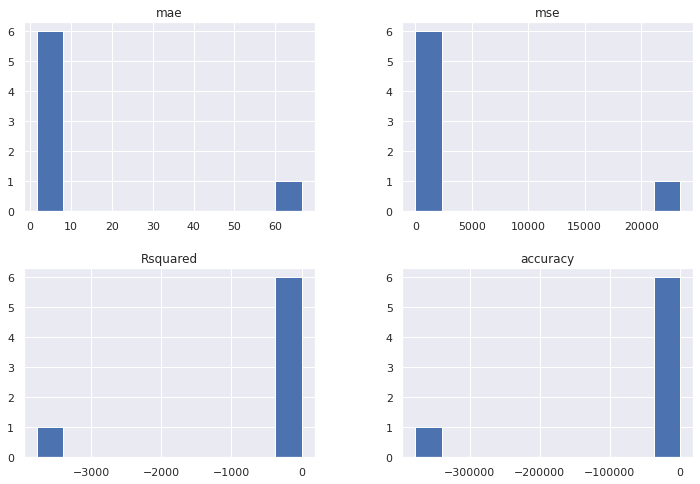

In [40]:

output.hist()


In [41]:
#Muller loop classification
# Modified from ...
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost", 
         "Naive Bayes"# "QDA"
         ]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB()]
    # QuadraticDiscriminantAnalysis()]

In [42]:
max_score = 0.0
max_class = ''
# iterate over classifiers
for name, clf in zip(names, classifiers):
    # start_time = time()
    clf.fit(X_train, y_train)
    score = 100.0 * clf.score(X_test, y_test)
    # print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score))
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
#plot the output of the various algorithms

Classifier = Nearest Neighbors, Score (test, accuracy) = 33.33,
Classifier = Linear SVM, Score (test, accuracy) = 58.33,
Classifier = RBF SVM, Score (test, accuracy) = 61.11,
Classifier = Decision Tree, Score (test, accuracy) = 50.00,
Classifier = Random Forest, Score (test, accuracy) = 55.56,
Classifier = Neural Net, Score (test, accuracy) = 58.33,
Classifier = AdaBoost, Score (test, accuracy) = 58.33,
Classifier = Naive Bayes, Score (test, accuracy) = 50.00,
--------------------------------------------------------------------------------
Best --> Classifier = RBF SVM, Score (test, accuracy) = 61.11


In [43]:
#Decision Tree regression
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [44]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  13.61
MAE :  2.67
RSquared :  -1.19


In [45]:
#Applying Linear reggression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [46]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  6.63
MAE :  2.03
RSquared :  -0.07


In [47]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,2.836435
1,2,2.835142
2,6,3.079913
3,2,3.016572
4,2,2.819277
5,2,2.955672
6,2,3.217917
7,7,2.835524
8,2,2.894555
9,8,3.027305


In [68]:
# Appliying KNN regressor
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train,y_train)
y_pred = knr.predict(X_test)

In [69]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  6.35
MAE :  1.86
RSquared :  -0.02


In [70]:
#Applying MLP

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [71]:
from sklearn import metrics
import numpy as np

print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))

MSE :  8.27
MAE :  2.09
RSquared :  -0.33


In [72]:
#Applying Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [73]:
print("MSE : " , np.round(metrics.mean_squared_error(y_test, y_pred), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test, y_pred), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test, y_pred), 2))


MSE :  7.55
MAE :  2.11
RSquared :  -0.21


I have implemented the Muller loop and different algorithm as part of the assignment. From here on, I have just played with some analysis, additional to the assignment

In [48]:
############# New regression
X_1 = df_new[['FIRE_SIZE']]
y_1 = df_new['FIRE_YEAR']

In [49]:

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25)

In [50]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_1,y_train_1)
y_pred_1 = lr.predict(X_test_1)

In [51]:
print("MSE : " , np.round(metrics.mean_squared_error(y_test_1, y_pred_1), 2))
print("MAE : " , np.round(metrics.mean_absolute_error(y_test_1, y_pred_1), 2))
print("RSquared : " , np.round(metrics.r2_score(y_test_1, y_pred_1), 2))

MSE :  9.79
MAE :  2.65
RSquared :  -0.0


Generated the co-relation matrix, why I chose to work with Altitude, and fire year. Followings are just some more analysis of the project

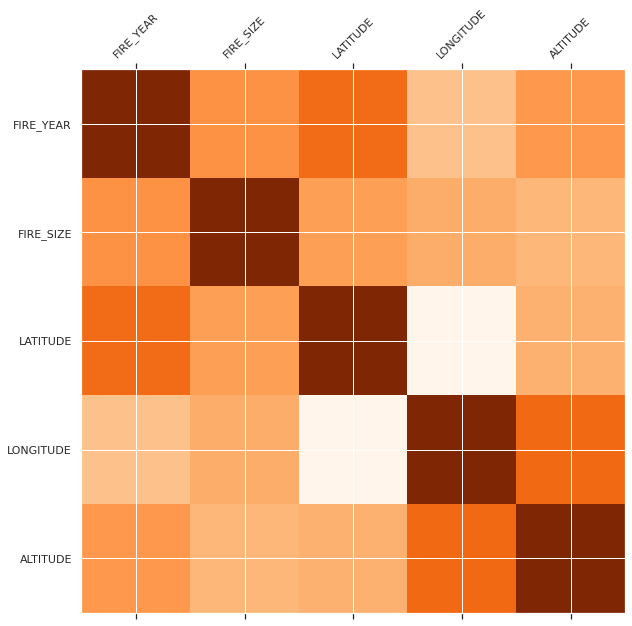

In [52]:
def plot_corr(df_new,size=10):
    corr = df_new.corr()  #the default method is pearson
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

    
plot_corr(df_new)

Looking at below graph, we can say that latent variable - Duration and fire-year has some linearity. Calculating keras, regression and muller loop by considering "Fire Duration"


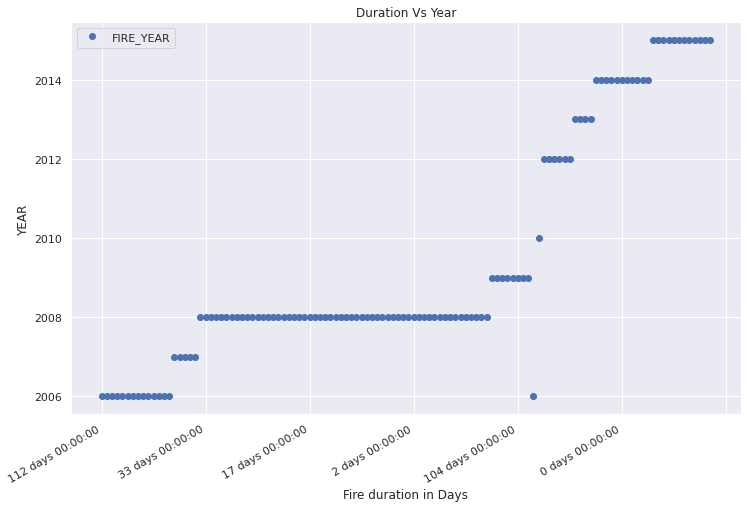

In [59]:
df2.plot(x='Fire-duration', y='FIRE_YEAR', style='o')  
plt.title('Duration Vs Year')  
plt.xlabel('Fire duration in Days')  
plt.ylabel('YEAR')  
plt.show()